In [1]:
from PIL import Image
from matplotlib import pyplot as plt
from collections import Counter
from scipy import ndimage as ndi
from skimage import feature
import scipy.misc
import numpy as np
import statistics
import random
import scipy

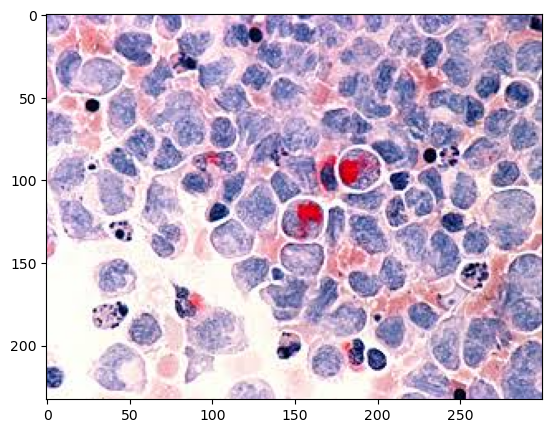

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize']=[10,5]


img_cancerbgr=cv2.imread('cancer.jpg')#imagen trabajada
img_cancerrbg=plt.imread('cancer.jpg')

imagen=cv2.cvtColor(img_cancerbgr,cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

plt.show()


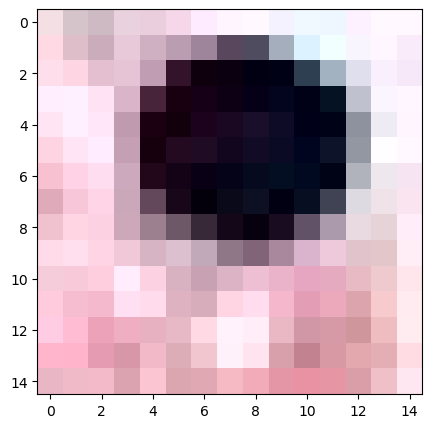

In [9]:
plt.imshow(imagen[50:65,20:35,:])#identificar por x,y y color rgb

plt.show()



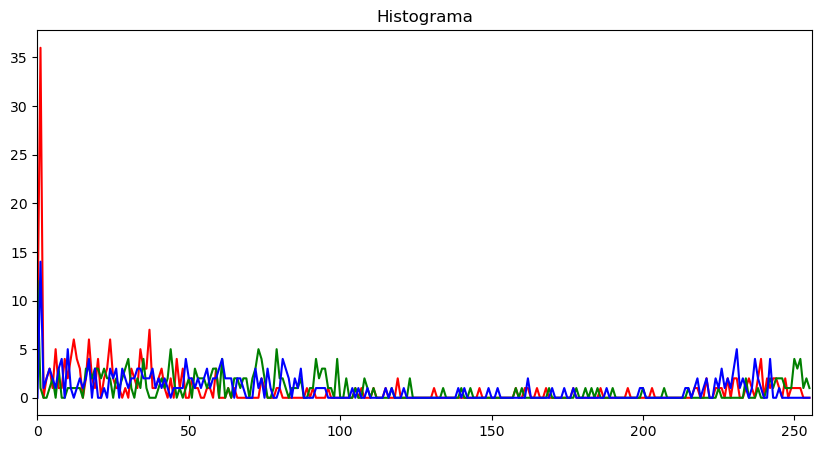

In [12]:
# plt.imshow(imagen[50:65,20:35,:])
# plt.show()

celula_cancer=imagen[50:65,20:35,:]
plt.imsave('celula_cancer.jpg',celula_cancer)
celula=plt.imread('celula_cancer.jpg')
color= ('r','g','b')
for canal, col in enumerate(color):
    histograma=cv2.calcHist([celula*255],[canal],None,[256],[0,256])
    plt.plot(histograma,color=col)
    plt.xlim([0,256])

plt.title('Histograma')
plt.show()

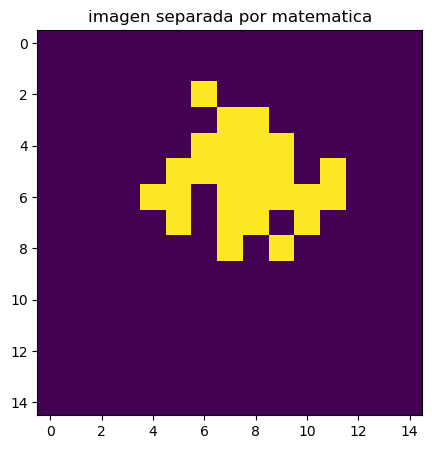

In [20]:
r_celula=celula[:,:,0]*255
g_celula=celula[:,:,1]*255
b_celula=celula[:,:,2]*255

r_celula=r_celula>200
g_celula=g_celula>100
b_celula=b_celula>200

#convertir array bidimensional
img_final=np.array(r_celula*g_celula*b_celula*255,dtype=int)

plt.imshow(img_final)
plt.title('imagen separada por matematica')
plt.show()

solarizacion y posterizacion
clase 19_03_24 - 20_03_24

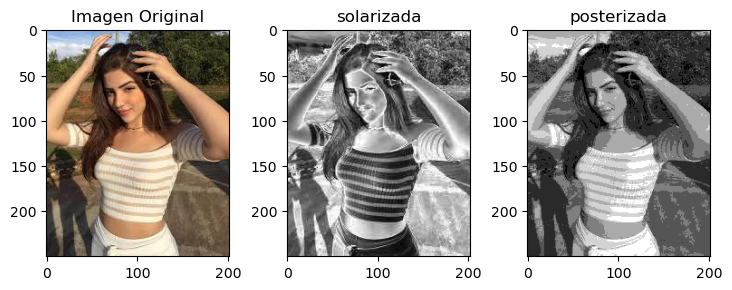

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def solarizar(image,umbral):
    img_solarizada=np.where(image<umbral,image,255-image)
    return img_solarizada

def posterizar(image,nivel):
    f_nvl=255/nivel
    img_poster=np.round(image/f_nvl)*f_nvl
    return img_poster.astype(np.uint8)


imagen=cv2.imread('girl1.jpg')
img_cris=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) 
umbral=127
img_solarizada=solarizar(img_cris,umbral)

#################################
nivel=6
img_posterizada=posterizar(img_cris,nivel)
#################################
plt.figure(figsize=(15, 10))

plt.subplot(3, 5, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")

plt.subplot(3,5,2)
plt.imshow(img_solarizada, cmap='gray')
plt.title('solarizada')

plt.subplot(3,5,3)
plt.imshow(img_posterizada, cmap='gray')
plt.title('posterizada')

plt.show()




practica: 19_03_24
realiza un pequeño script que permita visualizar una lista de paleta de colores disponibles en opencv a través de un ciclo pepetitivo.

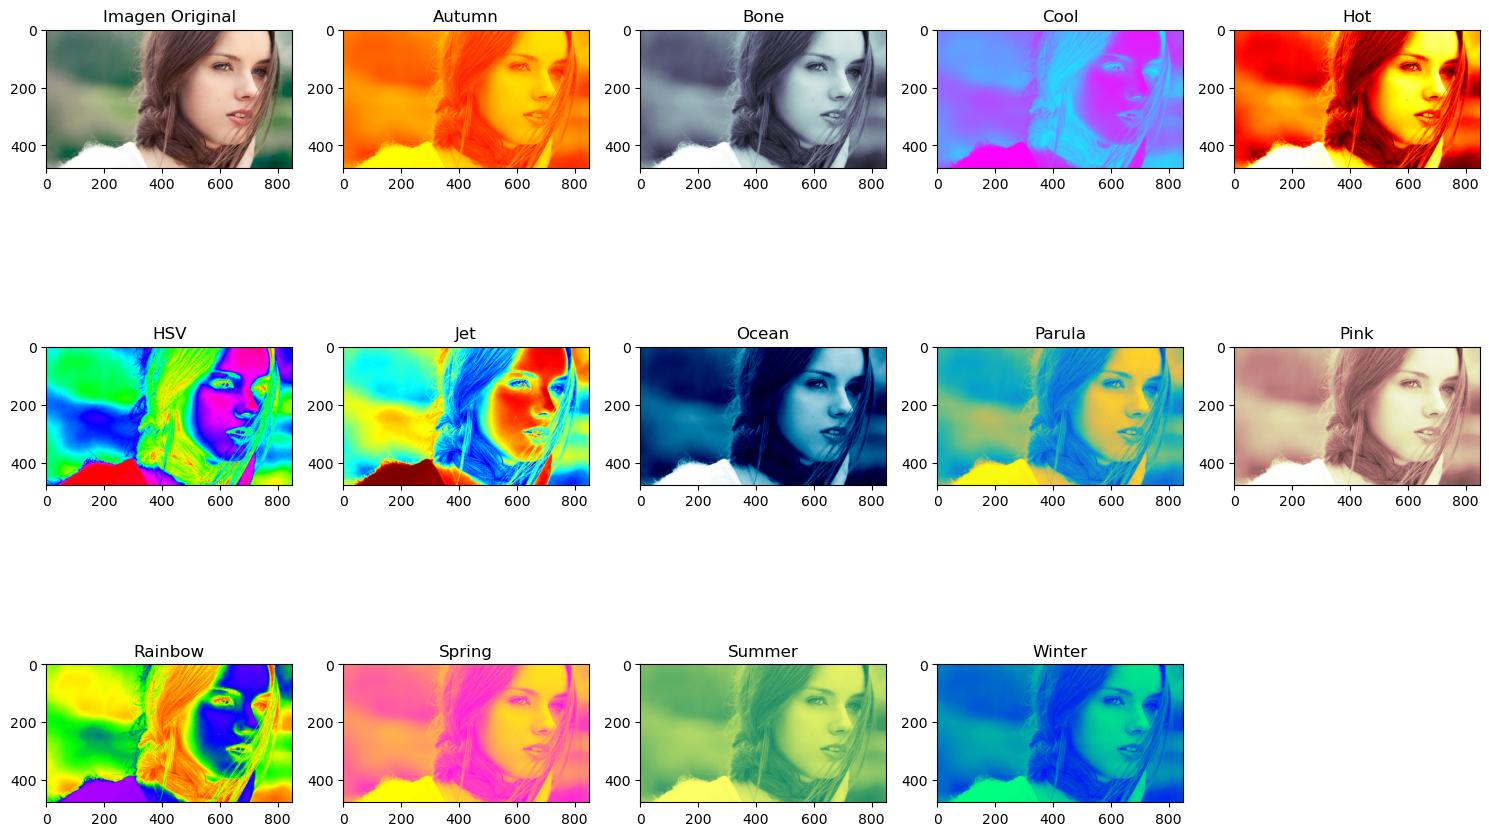

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

paletas = [cv2.COLORMAP_AUTUMN, cv2.COLORMAP_BONE, cv2.COLORMAP_COOL,
           cv2.COLORMAP_HOT, cv2.COLORMAP_HSV, cv2.COLORMAP_JET,
           cv2.COLORMAP_OCEAN, cv2.COLORMAP_PARULA, cv2.COLORMAP_PINK,
           cv2.COLORMAP_RAINBOW, cv2.COLORMAP_SPRING, cv2.COLORMAP_SUMMER,
           cv2.COLORMAP_WINTER]


nome_paletas = ["Autumn", "Bone", "Cool", "Hot", "HSV", "Jet", "Ocean", 
                   "Parula", "Pink", "Rainbow", "Spring", "Summer", "Winter"]


imagen = cv2.imread("girl.jpg")


plt.figure(figsize=(15, 10))
plt.subplot(3, 5, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")


for i, paleta in enumerate(paletas):
    
    imagen_paleta = cv2.applyColorMap(imagen, paleta)    
    plt.subplot(3, 5, i+2)
    plt.imshow(cv2.cvtColor(imagen_paleta, cv2.COLOR_BGR2RGB))
    plt.title(nome_paletas[i])
plt.tight_layout()
plt.show()

clase: 20_03_24

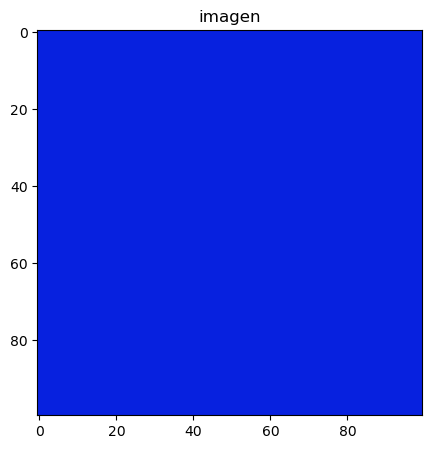

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[10,5]
tamanio_img=100
R=np.ones((tamanio_img,tamanio_img))*7
G=np.ones((tamanio_img,tamanio_img))*33
B=np.ones((tamanio_img,tamanio_img))*223

imagen=np.dstack((R,G,B))
imagen=np.array(imagen,dtype=int)

plt.figure()
plt.imshow(imagen)
plt.title('imagen')

plt.show()



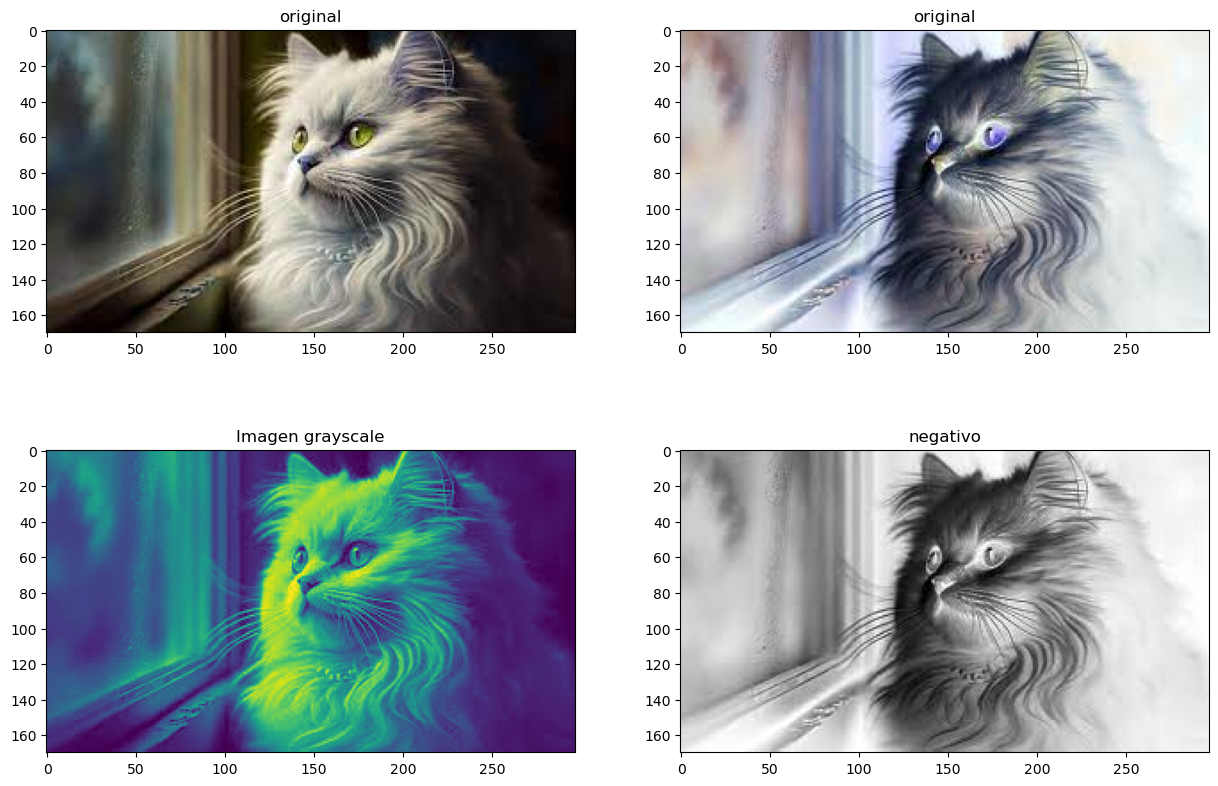

In [31]:
import cv2 
import matplotlib.pyplot as plt




img_cris=cv2.imread('gatin.jfif', cv2.IMREAD_GRAYSCALE)
imagen_color=cv2.imread('gatin.jfif', cv2.COLOR_BGR2RGB)
negativo_cris=255-img_cris
negativo_imagen_color=255-imagen_color



plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
plt.imshow(imagen_color)
plt.title('original')

plt.subplot(2,2,2)
plt.imshow(negativo_imagen_color)
plt.title('original')

plt.subplot(2, 2, 3)
plt.imshow(img_cris)
plt.title("Imagen grayscale")

plt.subplot(2,2,4)
plt.imshow(negativo_cris, cmap='gray')
plt.title('negativo')



plt.show()